cluster centers are: 
[[ 2.          0.63333333]
 [10.3        12.33333333]]
Labels are: 
[0 0 0 1 1 1]


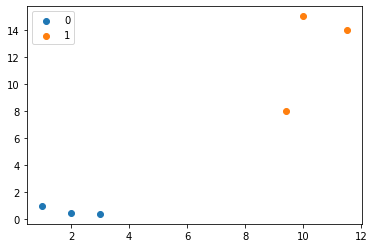

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 


class KMeans:
    def __init__(self,k):
      self.k=k
      self.iterations=300
    def fit(self,x):

      idx = np.random.choice(len(x), self.k, replace=False)
      #Randomly choosing Centroids 
      centroids = np.array(x)[idx, :] #Step 1

      #finding the distance between centroids and all the data points
      distances = cdist(x, centroids ,'euclidean') #Step 2
     
      #Centroid with the minimum Distance
      points = np.array([np.argmin(i) for i in distances]) #Step 3
     
      #Repeating the above steps for a defined number of iterations
      #Step 4
      for _ in range(self.iterations): 
        centroids = []
        for idx in range(self.k):
          #Updating Centroids by taking mean of Cluster it belongs to
          temp_cent =np.array(x)[points==idx].mean(axis=0) 
          centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
      return centroids,points 


km=KMeans(k=2) 
X=([1,1],[2,0.5],[3,0.4],[10,15],[11.5,14],[9.4,8])
cluster_centers,label = km.fit(X)

print('cluster centers are: ')
print(cluster_centers)
print('Labels are: ')
print(label)

#Visualize the results
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(np.array(X)[label == i , 0] , np.array(X)[label == i , 1] , label = i)
plt.legend()
plt.show()

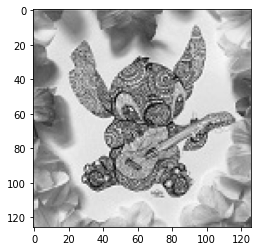

(15876, 1)


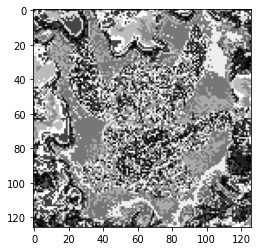

In [4]:
from PIL import Image

img = Image.open("/content/36.JPG").convert('L')
img_arr=np.array(img)
plt.figure()
plt.imshow(img_arr,cmap='gray')
plt.show()
imgshape=img_arr.shape
img_arr =np.reshape(img_arr,(1,-1))
img_arr = np.transpose(img_arr)
print(img_arr.shape)
#one_dim = one_dim.astype('float64')
one_dim=np.reshape(img_arr,(img_arr.shape[0]*img_arr.shape[1],1))
one_dim = one_dim.astype('float64')

km = KMeans(k = 16)
center,lab = km.fit(one_dim)
remake=np.reshape(lab,imgshape)

plt.figure()
plt.imshow(remake,cmap='gray')
plt.show()

